# Predicting a cancer diagnosis using machine learning.

This notebook examines the use of various Python-based machine learning and data science libraries, in an attempt to build a machine reading model capable of predicting whether cancer os malignant or benign based on its cell characteristics.

We are goint to following this approach:
1. Problem definition
2. Data
3. Evaluation
4. Modelling
6. Experimentation

## 1. Problem Definition:

In a statement,
> Given the characteristics of  cancer, can we predict whether it is malignant or benign?

## 2. Data

The original data came from Cleavland data from the UCI Machine learning Repository.
This databese also available through the UW CS ftp server.
The is also a version of it availabe on Kaggle.
<b>Links:</b>
1. https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
2. https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## 3. Evaluation

>If can reach 90% accuracy at precting whether or not a patient as heart disease during the proofof concept, we will pursue the project.

## 4. Features

<b>Attribute Information:<b>

1) ID number

2) Diagnosis (M = malignant, B = benign)

<b>Ten real-valued features are computed for each cell nucleus:</b>

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)



## Preparing the tools

We are going to use pandas, matplotlib and numpy for data analysis and manipulation

In [73]:
# import all the tools we need

#Regular EDA(exploratory data analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [74]:
df = pd.read_csv('datasets_180_408_data.csv')
df.shape

(569, 33)

Look the shape of our dataset , we have 569 inputs and 33 features.

## Data Exploration ( exploratory data analysis or EDA)

The goal here is to find more about the data and become a subject matter expert on the dataset you are working with.

1. What question(s) are you trying to solve?
2. What kind of data we have an how do we treat different types?
3. What is missing from data and how deal with it?
4. Where are the outliersand why should you care about them?
5. How can tou add, change or remove features to get more out of your data.

In [75]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [77]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

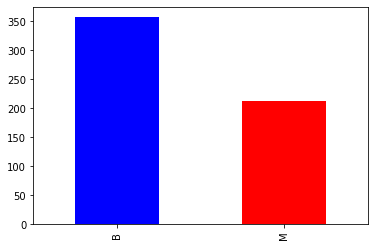

In [78]:
df['diagnosis'].value_counts().T.plot(kind='bar', color=['blue','red'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [80]:
#Are there any missing values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We are going to delete the last column and the first , because they don´t bring any type of information

In [81]:
df.drop('Unnamed: 32', axis=1, inplace = True)
df.drop('id', axis=1, inplace = True)

We are goind to see if there are any duplicated row.

In [82]:
df.duplicated().sum()

0

## Correlation matrix

In [83]:
#Make a correlatioin matrix
corr_matrix = df.corr()

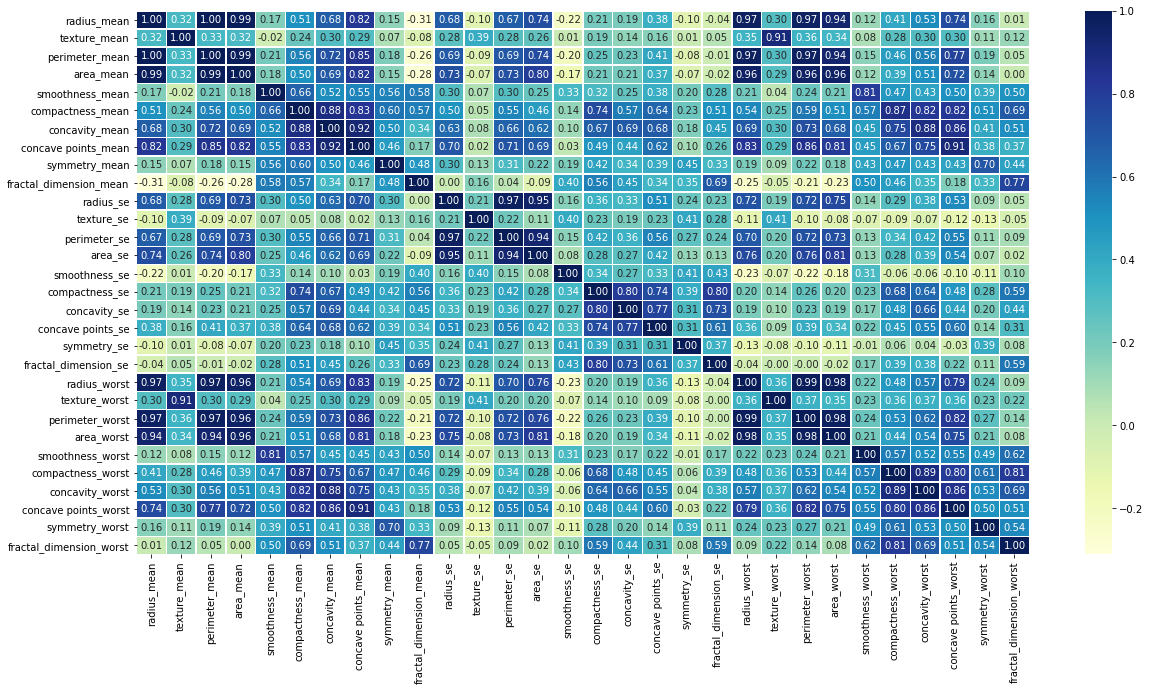

In [84]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap = 'YlGnBu')

## 5. Modeling

In [85]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We need transform diagnosis in to a numerical data

In [86]:
ports = {'M': 0, 'B': 1}

df['diagnosis'] = df['diagnosis'].map(ports)

In [87]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [90]:
X = df.drop('diagnosis', axis=1)

y= df['diagnosis']

In [92]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [93]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [94]:
#Split data into train and test sets
np.random.seed(42)

#Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [95]:
# Put models in a dictionart
models = {'Logistic Regression': LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for nome, model in models.items():
        model.fit(X_train, y_train)
        model_scores[nome] = model.score(X_test, y_test)
    
    return model_scores

In [96]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                             X_test= X_test, 
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\thiag\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.956140350877193,
 'KNN': 0.956140350877193,
 'Random Forest': 0.9649122807017544}

## Model Comparison 

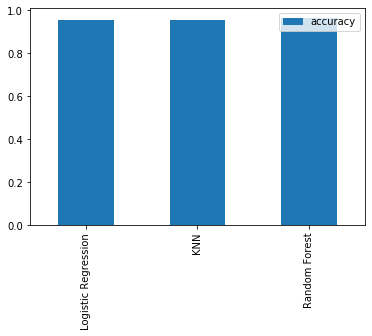

In [97]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar()

Now we´ve got a baseline model... and we know a model first predictions aren´t always what we should
based our next steps off. What should do?

Let´s look at the following:
* Hypyerparameter tuning
* Feature importance
* Confusioin matrix
* Cross- validatioin
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
* LogiticRegression()
* RandomClassifier()

... using randomizedSearch cv 

In [100]:
#Create a hyperparameter grid for  logisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver':['liblinear'] }

#Create a hyperparameter grid for  RandomForestClassifier
rf_grid={'n_estimators':np.arange(100,1000,50),
        'max_depth':[None, 3, 5, 10],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2)}

Now we have got hyperparameter grids setup for each of our models,
let is tune them using RandomizedSearchCV

In [101]:
#Tune logistic regression

np.random.seed(42)

#setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)


#fit random hyperparameter search model for logisticRegression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [102]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [103]:
rs_log_reg.score(X_test,y_test)

0.956140350877193

Now we´ve tuned LogisticRegression(), let´s do the same for randomForestClassifier()...

In [104]:
#Setup random seed

np.random.seed(42)

#setup random hyperparameter search for LogisticRegression

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)


#fit random hyperparameter search model for RandomForestClassifier

rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [105]:
rs_rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [106]:
rs_rf.score(X_test,y_test)

0.9649122807017544

## Hyperparamter tuning with GridSearch CV

Since our LogisticRegression model provides the best scores so far, we´ll try and improve tgem again using GridSearchCV

In [107]:
# Different  hyperparameters for our Logistc Regression model

log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver':['liblinear'] }

#Setup grud hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,cv=5,verbose=True)

# Fit grid hyperparameter searc model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


In [108]:
#Check the best hypeparamaters
gs_log_reg.best_params_

{'C': 1487.3521072935118, 'solver': 'liblinear'}

In [109]:
gs_log_reg.score(X_test, y_test)

0.956140350877193

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classication report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [110]:
# Make predicton with tuned model
y_preds = gs_log_reg.predict(X_test)

In [111]:
y_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0], dtype=int64)

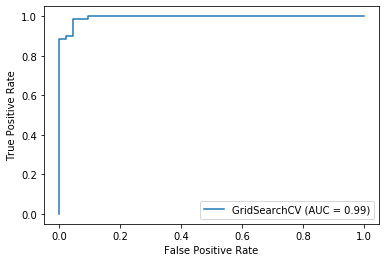

In [112]:
#Plot ROC curve and calculate and caculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [113]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[39  4]
 [ 1 70]]


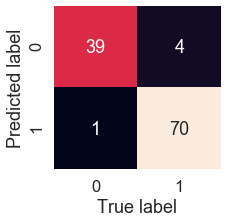

In [114]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds)

Now we have got a ROC curve, an AUC metric and a confusion matrix, let is get a classification report as well as cross-validated precision, recall and f1-score

In [115]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Calculate evalution metrics using cross-validation

We are goint to calculate precison, recall and f1-score of our model using cross-validation and to do so we will e using
`cross_val_score()`

In [116]:
# Check best hyperpararemeters
gs_log_reg.best_params_

{'C': 1487.3521072935118, 'solver': 'liblinear'}

In [117]:
#Create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                        solver = 'liblinear')

In [118]:
#Cross-validated acurracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.92105263, 0.93859649, 0.97368421, 0.93859649, 0.94690265])

In [119]:
cv_acc = np.mean(cv_acc)
cv_acc

0.943766495885732

In [120]:
#Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.9461406107624095

In [121]:
#Cross-validated recall
cv_recall= cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9663536776212833

In [122]:
#Cross-validated f1_score
cv_f1= cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.9557647212773341

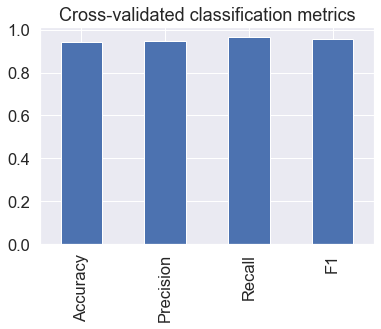

In [123]:
#Visualize cross-validated metrics

cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           'F1': cv_f1}, 
                           index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

### Feature Importance

Feature importance is another as asking, "which features contributed most to outcomes of the model and how did they contribute?"

Finding deature importance is different for each machine learning model.One way to find importance is to search for (MODEL NAME) feature importance

Let´s find the feature importance for our LogisticRegression model...

In [125]:
# Fit an intance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C= 0.20433597178569418,
                        solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
#Check coef_
clf.coef_

array([[ 0.9822138 ,  0.10516142,  0.18246441, -0.00810527, -0.043147  ,
        -0.17775139, -0.25500905, -0.11660715, -0.06328432, -0.01170583,
         0.01524199,  0.51961033, -0.04622036, -0.06876559, -0.00441429,
        -0.02563955, -0.0407924 , -0.01419983, -0.01409315, -0.00162427,
         0.889668  , -0.28398029, -0.16169938, -0.01847162, -0.07854326,
        -0.53167526, -0.66879493, -0.21407405, -0.21557801, -0.04991541]])

In [130]:
#Match coef is of features to columns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'diagnosis': 0.9822138002089966,
 'radius_mean': 0.1051614223687359,
 'texture_mean': 0.18246441409141634,
 'perimeter_mean': -0.008105269370866752,
 'area_mean': -0.04314700154687467,
 'smoothness_mean': -0.17775138562575635,
 'compactness_mean': -0.255009050589942,
 'concavity_mean': -0.11660715472307945,
 'concave points_mean': -0.06328432477343054,
 'symmetry_mean': -0.011705830481471655,
 'fractal_dimension_mean': 0.015241989930756678,
 'radius_se': 0.5196103331007216,
 'texture_se': -0.0462203636226501,
 'perimeter_se': -0.0687655882135499,
 'area_se': -0.004414291917319975,
 'smoothness_se': -0.025639551002215037,
 'compactness_se': -0.04079239616886576,
 'concavity_se': -0.014199832324723579,
 'concave points_se': -0.01409315292807968,
 'symmetry_se': -0.0016242737686356233,
 'fractal_dimension_se': 0.8896679958014644,
 'radius_worst': -0.2839802859511543,
 'texture_worst': -0.1616993827384961,
 'perimeter_worst': -0.018471616812910055,
 'area_worst': -0.07854325974883407,
 's

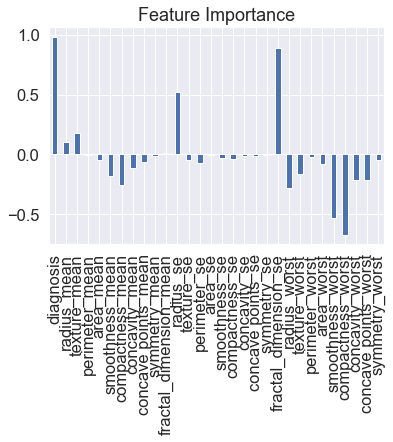

In [128]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                     legend=False)